In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix , classification_report, f1_score,\
                            accuracy_score, precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv('student-mat.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [4]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [5]:
df['GScore'] = df[['G1','G2','G3']].mean(axis=1)

In [6]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,GScore
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190,10.679325
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443,3.696786
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,1.333333
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000,8.333333
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000,10.666667
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000,13.333333
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,19.333333


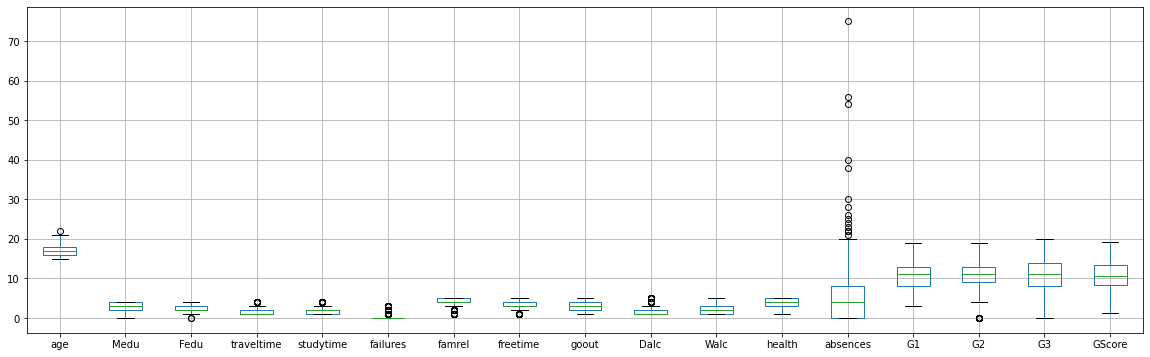

In [7]:
fig = plt.figure()
df.boxplot()
fig.set_figheight(6)
fig.set_figwidth(20)

array([[<AxesSubplot:title={'center':'failures'}>,
        <AxesSubplot:title={'center':'absences'}>]], dtype=object)

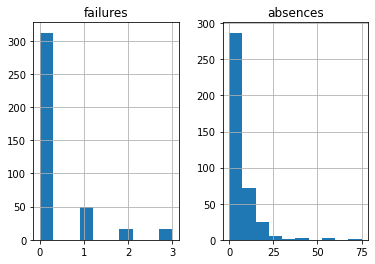

In [8]:
df[['failures','absences']].hist()

array([[<AxesSubplot:title={'center':'studytime'}>,
        <AxesSubplot:title={'center':'traveltime'}>]], dtype=object)

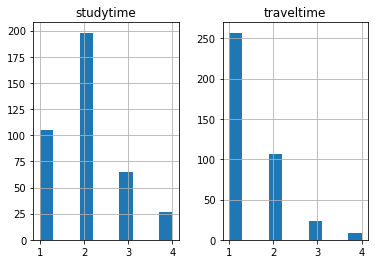

In [9]:
df[['studytime','traveltime']].hist()

In [10]:
df[df.absences > 30]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,GScore
74,GP,F,16,U,GT3,T,3,3,other,services,...,3,3,2,4,5,54,11,12,11,11.333333
183,GP,F,17,U,LE3,T,3,3,other,other,...,3,3,2,3,1,56,9,9,8,8.666667
276,GP,F,18,R,GT3,A,3,2,other,services,...,1,1,1,1,5,75,10,9,9,9.333333
307,GP,M,19,U,GT3,T,4,4,teacher,services,...,3,4,1,1,4,38,8,9,8,8.333333
315,GP,F,19,R,GT3,T,2,3,other,other,...,1,2,1,1,3,40,13,11,11,11.666667


In [11]:
df.drop([74,183,276,307,315],inplace=True)

<AxesSubplot:>

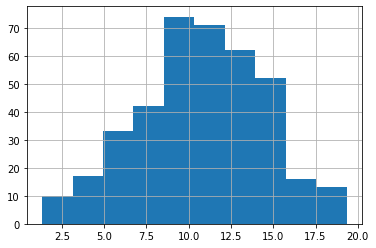

In [12]:
df['GScore'].hist()

In [13]:
conditions = [
        (df['GScore'] <= 4),
        (df['GScore'] > 4) & (df['GScore'] <= 8),
        (df['GScore'] > 8) & (df['GScore'] <= 12),
        (df['GScore'] > 12) & (df['GScore'] <= 16),
        (df['GScore'] > 16)
]

values = [5,4,3,2,1]

df['Tier']=np.select(conditions, values)

<AxesSubplot:>

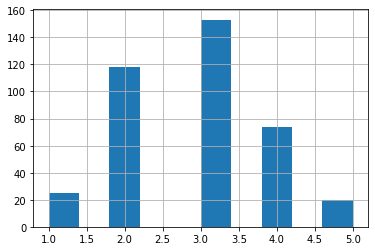

In [14]:
df['Tier'].hist()

In [15]:
df['sex'].replace({'F':1,'M':0},inplace=True)

In [16]:
df['address'].replace({'U':1,'R':0},inplace=True)

In [17]:
df['famsize'].replace({'LE3':1,'GT3':0},inplace=True)

In [18]:
df['Pstatus'].replace({'T':1,'A':0},inplace=True)

In [19]:
df['schoolsup'].replace({'yes':1,'no':0},inplace=True)

In [20]:
df['famsup'].replace({'yes':1,'no':0},inplace=True)

In [21]:
df['paid'].replace({'yes':1,'no':0},inplace=True)

In [22]:
df['activities'].replace({'yes':1,'no':0},inplace=True)

In [23]:
df['nursery'].replace({'yes':1,'no':0},inplace=True)

In [24]:
df['higher'].replace({'yes':1,'no':0},inplace=True)

In [25]:
df['internet'].replace({'yes':1,'no':0},inplace=True)

In [26]:
df['romantic'].replace({'yes':1,'no':0},inplace=True)



In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 0 to 394
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      390 non-null    object 
 1   sex         390 non-null    int64  
 2   age         390 non-null    int64  
 3   address     390 non-null    int64  
 4   famsize     390 non-null    int64  
 5   Pstatus     390 non-null    int64  
 6   Medu        390 non-null    int64  
 7   Fedu        390 non-null    int64  
 8   Mjob        390 non-null    object 
 9   Fjob        390 non-null    object 
 10  reason      390 non-null    object 
 11  guardian    390 non-null    object 
 12  traveltime  390 non-null    int64  
 13  studytime   390 non-null    int64  
 14  failures    390 non-null    int64  
 15  schoolsup   390 non-null    int64  
 16  famsup      390 non-null    int64  
 17  paid        390 non-null    int64  
 18  activities  390 non-null    int64  
 19  nursery     390 non-null    i

In [28]:
df_num = df.select_dtypes(include=['number'])

In [29]:
df_num.corr()

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,goout,Dalc,Walc,health,absences,G1,G2,G3,GScore,Tier
sex,1.000000,0.027746,0.036957,-0.091751,-0.018223,-0.075840,-0.033619,-0.055376,0.303429,-0.041325,...,-0.067149,-0.271978,-0.280028,-0.144283,0.022958,-0.094458,-0.091752,-0.104165,-0.102418,0.102198
age,0.027746,1.000000,-0.138077,0.044202,0.035164,-0.168323,-0.172486,0.068323,-0.003722,0.239359,...,0.135026,0.139633,0.132800,-0.063082,0.165289,-0.062587,-0.141346,-0.160187,-0.132863,0.137527
address,0.036957,-0.138077,1.000000,0.067048,-0.057497,0.136182,0.069917,-0.331069,-0.014075,-0.077444,...,0.055215,-0.100665,-0.113685,-0.037316,0.016216,0.074196,0.126380,0.107304,0.109404,-0.095366
famsize,-0.091751,0.044202,0.067048,1.000000,-0.156686,-0.042820,-0.058274,0.067088,-0.074355,-0.012639,...,0.020146,0.098227,0.099673,-0.018682,0.066839,0.073459,0.082741,0.083064,0.084362,-0.072226
Pstatus,-0.018223,0.035164,-0.057497,-0.156686,1.000000,-0.124381,-0.096022,0.035660,0.024494,-0.007559,...,-0.010528,-0.035167,-0.001348,0.031402,-0.122971,-0.018485,-0.044923,-0.060384,-0.045720,0.030260
Medu,-0.075840,-0.168323,0.136182,-0.042820,-0.124381,1.000000,0.623674,-0.175747,0.071025,-0.238193,...,0.061839,0.020191,-0.046876,-0.049125,0.115849,0.210399,0.218061,0.220050,0.227828,-0.211927
Fedu,-0.033619,-0.172486,0.069917,-0.058274,-0.096022,0.623674,1.000000,-0.158844,-0.006200,-0.255627,...,0.039803,0.002916,-0.011466,0.016410,0.002972,0.193926,0.166689,0.154878,0.178543,-0.170727
traveltime,-0.055376,0.068323,-0.331069,0.067088,0.035660,-0.175747,-0.158844,1.000000,-0.097270,0.091887,...,0.029074,0.142243,0.140921,0.002849,-0.015661,-0.091068,-0.152057,-0.116378,-0.126910,0.129908
studytime,0.303429,-0.003722,-0.014075,-0.074355,0.024494,0.071025,-0.006200,-0.097270,1.000000,-0.174636,...,-0.059329,-0.197171,-0.256490,-0.074238,-0.083602,0.156821,0.134785,0.096151,0.132355,-0.107484
failures,-0.041325,0.239359,-0.077444,-0.012639,-0.007559,-0.238193,-0.255627,0.091887,-0.174636,1.000000,...,0.123802,0.139884,0.148898,0.066962,0.095153,-0.356805,-0.357020,-0.361642,-0.377262,0.362946


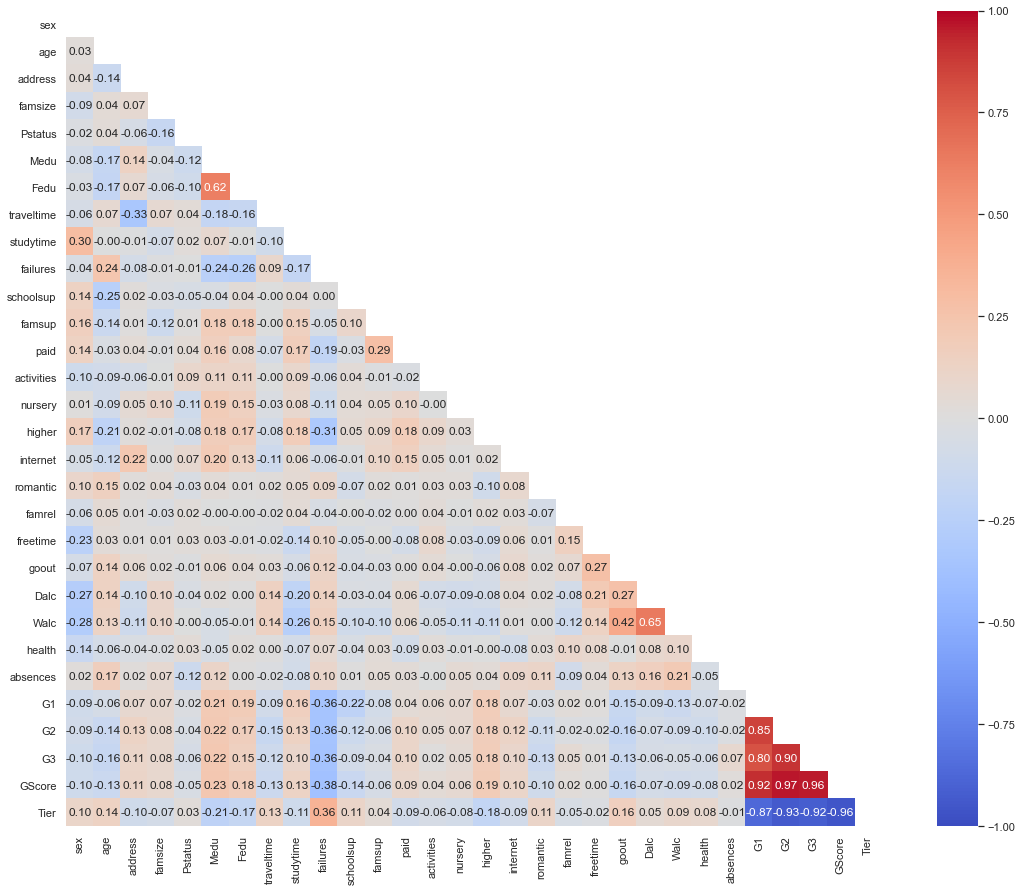

In [30]:
# correlation matrix heatmap visualization
sns.set(style="white")

# Generate a mask for the upper triangle
matrix = np.triu(df.corr())

# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(20,15))

# Plot the heatmap
_ = sns.heatmap(df.corr(), mask=matrix, annot=True, annot_kws={"size": 12}, square=True, 
                cmap='coolwarm' , vmin=-1, vmax=1, fmt='.2f') 

In [31]:
df['Pedu'] = df[['Medu','Fedu']].mean(axis=1)

In [32]:
df['Pedu']

0      4.0
1      1.0
2      1.0
3      3.0
4      3.0
      ... 
390    2.0
391    2.0
392    1.0
393    2.5
394    1.0
Name: Pedu, Length: 390, dtype: float64

In [33]:
#Initial

#X = df[['sex','age','famsize','Pstatus','traveltime','studytime','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic','famrel','freetime','goout','Walc','health', 'absences','Pedu']]
#y = df['Tier']

#Kbest

#X = df[['schoolsup','paid','romantic','famrel','goout','Walc','health', 'absences','Pedu']]
#y = df['Tier']

In [34]:
models = []
precision_list = []
recall_list = []
f1_score_list = []
training_acc_list = []
testing_acc_list = []

In [35]:
X = df[['sex','age','famsize','Pstatus','traveltime','studytime','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic','famrel','freetime','goout','Walc','health', 'absences','Pedu']]
y = df['Tier']

In [36]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2


In [37]:
selector = SelectKBest(score_func=chi2, k=8)
selector.fit(X,y)

SelectKBest(k=8, score_func=<function chi2 at 0x000001D128AD0D30>)

In [38]:
cols = selector.get_support(indices=True)
features_df_new = X.iloc[:,cols]

In [39]:
features_df_new

,schoolsup,paid,romantic,goout,Walc,health,absences,Pedu
0,1,0,0,4,1,3,6,4.0
1,0,0,0,3,1,3,4,1.0
2,1,1,0,2,3,3,10,1.0
3,0,1,1,2,1,5,2,3.0
4,0,1,0,2,2,5,4,3.0
...,...,...,...,...,...,...,...,...
390,0,1,0,4,5,4,11,2.0
391,0,0,0,5,4,2,3,2.0
392,0,0,0,3,3,3,3,1.0
393,0,0,0,1,4,5,0,2.5


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X ,y, 
                                                    test_size = 0.2, 
                                                    shuffle=True, 
                                                    stratify=y,
                                                    random_state=42)

In [41]:
# Import the logistic regression algorithm
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter=5000)

# Train the model
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [42]:
# Kept aside some data to test - X_test
y_pred = classifier.predict(X_test)

compare_df = pd.DataFrame({"Desired Output (Actuals)": y_test, 
                           "Predicted Output": y_pred})

In [43]:
compare_df[:10]

,Desired Output (Actuals),Predicted Output
95,3,3
330,3,2
314,2,3
130,5,2
106,4,3
165,3,4
30,3,2
251,3,3
78,3,4
167,2,2


In [44]:
from sklearn.metrics import classification_report, confusion_matrix, \
                            precision_score, recall_score

# Classification Report
print("Classification report:")
print()
print(classification_report(y_test, y_pred))
print()

Classification report:

              precision    recall  f1-score   support

           1       0.50      0.20      0.29         5
           2       0.50      0.33      0.40        24
           3       0.46      0.73      0.56        30
           4       0.43      0.20      0.27        15
           5       0.60      0.75      0.67         4

    accuracy                           0.47        78
   macro avg       0.50      0.44      0.44        78
weighted avg       0.48      0.47      0.44        78




In [45]:
logreg = LogisticRegression()

In [46]:
models.append('Logistic Regression')
precision_list.append(precision_score(y_test, y_pred, average='macro'))
recall_list.append(recall_score(y_test, y_pred, average='macro'))
f1_score_list.append(f1_score(y_test, y_pred, average='macro'))
training_acc_list.append(accuracy_score(y_train, classifier.predict(X_train)))
testing_acc_list.append(accuracy_score(y_test, y_pred))

In [47]:
class_names = [1,2,3,4,5]

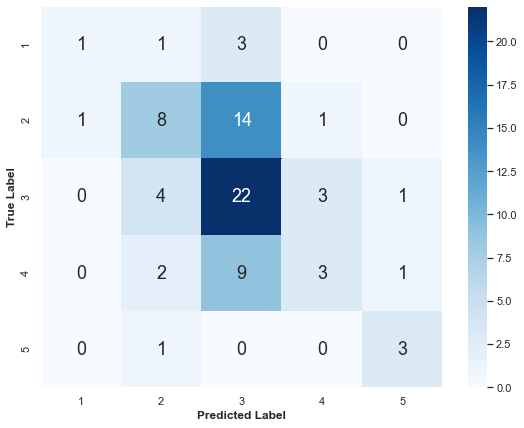

In [48]:
# Plot the confusion matrix using Seaborn library
plt.figure(figsize=(9,7))
_ = sns.heatmap(confusion_matrix(y_test, y_pred), 
                annot=True, annot_kws={"size": 18},
                cmap=plt.cm.Blues,
                xticklabels=class_names, yticklabels=class_names)
_ = plt.ylabel('True Label', fontweight='bold')
_ = plt.xlabel('Predicted Label', fontweight='bold')

In [49]:
#MLP

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

# Now apply the transformations to the data:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [52]:
# Multi-Level Perceptron
mlp = MLPClassifier()

In [53]:
%%time
# Hyperparameter tuning using K-fold cross validation
# ... via Grid Search method
param_grid = {'hidden_layer_sizes': [(3,3),
                                     (32,32),
                                     (9,9,9)], 
              'alpha': np.logspace(-4, -1, 4),
              'max_iter': [1000]}

gs_mlp = GridSearchCV(mlp,
                      param_grid, 
                      cv=5,
                      scoring='f1_macro',
                      n_jobs=-1)
gs_mlp.fit(X_train_scaled, y_train)

Wall time: 9.36 s


GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'alpha': array([0.0001, 0.001 , 0.01  , 0.1   ]),
                         'hidden_layer_sizes': [(3, 3), (32, 32), (9, 9, 9)],
                         'max_iter': [1000]},
             scoring='f1_macro')

In [54]:
# Best model hyperparameters and score
print(gs_mlp.best_estimator_)
print(gs_mlp.best_params_)
print(gs_mlp.best_score_)

MLPClassifier(hidden_layer_sizes=(32, 32), max_iter=1000)
{'alpha': 0.0001, 'hidden_layer_sizes': (32, 32), 'max_iter': 1000}
0.2814120460959223


In [55]:
# Using best estimator found by GridSearchCV
mlp = gs_mlp.best_estimator_
mlp.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(32, 32), max_iter=1000)

In [56]:
y_pred = mlp.predict(X_test_scaled)

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.67      0.40      0.50         5
           2       0.36      0.33      0.35        24
           3       0.55      0.53      0.54        30
           4       0.17      0.27      0.21        15
           5       1.00      0.25      0.40         4

    accuracy                           0.40        78
   macro avg       0.55      0.36      0.40        78
weighted avg       0.45      0.40      0.41        78



In [58]:
models.append('Multilevel Perceptron')
precision_list.append(precision_score(y_test, y_pred, average='macro'))
recall_list.append(recall_score(y_test, y_pred, average='macro'))
f1_score_list.append(f1_score(y_test, y_pred, average='macro'))
training_acc_list.append(accuracy_score(y_train, mlp.predict(X_train_scaled)))
testing_acc_list.append(accuracy_score(y_test, y_pred))

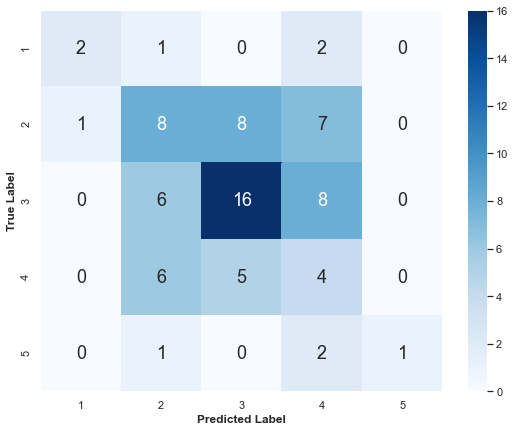

In [59]:
# Plot the confusion matrix using Seaborn library
plt.figure(figsize=(9,7))
_ = sns.heatmap(confusion_matrix(y_test, y_pred), 
                annot=True, annot_kws={"size": 18},
                cmap=plt.cm.Blues,
                xticklabels=class_names, yticklabels=class_names)
_ = plt.ylabel('True Label', fontweight='bold')
_ = plt.xlabel('Predicted Label', fontweight='bold')

In [60]:
#Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [63]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [64]:
y_pred = rf_classifier.predict(X_test)

In [65]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         7
           2       0.34      0.48      0.40        23
           3       0.41      0.50      0.45        32
           4       0.50      0.20      0.29        15
           5       0.00      0.00      0.00         1

    accuracy                           0.38        78
   macro avg       0.25      0.24      0.23        78
weighted avg       0.37      0.38      0.36        78



C:\Users\xiong\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
models.append('Random Forest 1')
precision_list.append(precision_score(y_test, y_pred, average='macro'))
recall_list.append(recall_score(y_test, y_pred, average='macro'))
f1_score_list.append(f1_score(y_test, y_pred, average='macro'))
training_acc_list.append(accuracy_score(y_train, rf_classifier.predict(X_train_scaled)))
testing_acc_list.append(accuracy_score(y_test, y_pred))

C:\Users\xiong\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


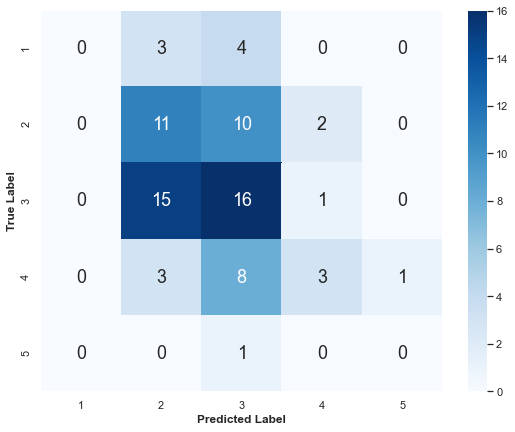

In [67]:
# Plot the confusion matrix using Seaborn library
plt.figure(figsize=(9,7))
_ = sns.heatmap(confusion_matrix(y_test, y_pred), 
                annot=True, annot_kws={"size": 18},
                cmap=plt.cm.Blues,
                xticklabels=class_names, yticklabels=class_names)
_ = plt.ylabel('True Label', fontweight='bold')
_ = plt.xlabel('Predicted Label', fontweight='bold')

In [68]:
# Random Forest
rf = RandomForestClassifier(n_jobs=-1)

In [69]:
%%time
# Hyperparameter tuning using K-fold cross validation
# ... via Grid Search method
param_grid = {'n_estimators': [100, 200, 300],
              'criterion': ['gini', 'entropy'],
              'max_depth': [5, 10, 25],
              'min_samples_split': [5, 10, 15]}

gs_rf = GridSearchCV(rf,
                    param_grid, 
                    cv=5,
                    scoring='f1_macro',
                    n_jobs=-1)
gs_rf.fit(X_train, y_train)

Wall time: 9.29 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 25],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [100, 200, 300]},
             scoring='f1_macro')

In [70]:
# Best model hyperparameters and score
print(gs_rf.best_estimator_)
print(gs_rf.best_params_)
print(gs_rf.best_score_)

RandomForestClassifier(criterion='entropy', max_depth=25, min_samples_split=5,
                       n_jobs=-1)
{'criterion': 'entropy', 'max_depth': 25, 'min_samples_split': 5, 'n_estimators': 100}
0.25719839176331566


In [71]:
# Using best estimator found by GridSearchCV
rf = gs_rf.best_estimator_
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=25, min_samples_split=5,
                       n_jobs=-1)

In [72]:
y_pred = rf.predict(X_test)

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         7
           2       0.31      0.35      0.33        23
           3       0.39      0.56      0.46        32
           4       0.50      0.20      0.29        15
           5       0.00      0.00      0.00         1

    accuracy                           0.37        78
   macro avg       0.24      0.22      0.21        78
weighted avg       0.35      0.37      0.34        78



C:\Users\xiong\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
models.append('Random Forest 2')
precision_list.append(precision_score(y_test, y_pred, average='macro'))
recall_list.append(recall_score(y_test, y_pred, average='macro'))
f1_score_list.append(f1_score(y_test, y_pred, average='macro'))
training_acc_list.append(accuracy_score(y_train, rf.predict(X_train_scaled)))
testing_acc_list.append(accuracy_score(y_test, y_pred))

C:\Users\xiong\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


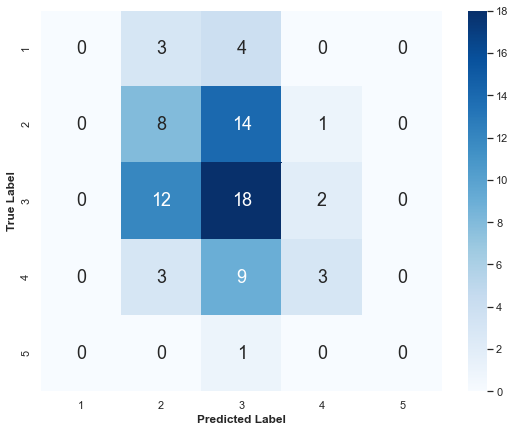

In [75]:
# Plot the confusion matrix using Seaborn library
plt.figure(figsize=(9,7))
_ = sns.heatmap(confusion_matrix(y_test, y_pred), 
                annot=True, annot_kws={"size": 18},
                cmap=plt.cm.Blues,
                xticklabels=class_names, yticklabels=class_names)
_ = plt.ylabel('True Label', fontweight='bold')
_ = plt.xlabel('Predicted Label', fontweight='bold')

In [76]:
model_metrics = pd.DataFrame(zip(models, training_acc_list, testing_acc_list,
                                 precision_list, recall_list, f1_score_list), 
                             columns=['Model', 'Training Acc', 'Testing Acc', 'Precision', 'Recall', 'F1 Score'])

In [77]:
model_metrics.sort_values(by='F1 Score', ascending=False)

,Model,Training Acc,Testing Acc,Precision,Recall,F1 Score
0,Logistic Regression,0.490385,0.474359,0.497381,0.443333,0.437842
1,Multilevel Perceptron,1.000000,0.397436,0.551188,0.356667,0.400145
2,Random Forest 1,0.294872,0.384615,0.250801,0.235652,0.227284
3,Random Forest 2,0.282051,0.371795,0.239799,0.222065,0.214757
